<h1 style="text-decoration :underline;color:red">Prédiction du vainqueur :</h1>

<p style="color:blue">Le but de ce notebook est de déterminer le vainqueur entre le favori et le challenger ainsi que la probabilité de victoire de chacun des joueurs. Ensuite on cherchera à déterminer l'écart significatif entre nos probabilités de victoires et celles des bookmakers pour parier sur les bons matchs afin d'obtenir le meilleur gain, ROI.</p>

<h2 style="text-decoration :underline;color:green">Module utilisé lors de ce notebook :</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

pd.set_option('max_columns', 40)

<h2 style="text-decoration :underline;color:green">lecture du fichier et nettoyage:</h2>

In [4]:
#df = pd.read_csv("atp_data.csv")
df = pd.read_csv("data_clean_all.csv",index_col=0)

In [5]:
#on enlève les variables non pertinentes pour l'algo
df= df.drop(["Favori","Challenger","Comment","Tournament","Round","Location","Date","Series","ATP","Best of","Winner","Wsets","Lsets","proba_elo_F","proba_elo_C"],axis=1)
df = df.reset_index().drop("index",axis=1)

In [6]:
df.head(10)

,Rank_F,PS_F,B365_F,elo_F,TV_F,TV_surf_F,sets_F,Rank_C,PS_C,B365_C,elo_C,TV_C,TV_surf_C,sets_C,Court,Surface,Vainqueur,moy_elo_F,moy_elo_C
0,58,1.719,1.615,1618.182210,0.500000,0.500000,0.0,246,2.210,2.200,1486.195239,0.428571,0.500000,0.0,Outdoor,Hard,challenger,-36.522332,-20.871951
1,6,1.385,1.364,1820.759485,0.763158,0.720000,0.0,43,3.250,2.875,1615.057648,0.461538,0.428571,0.0,Outdoor,Hard,challenger,19.791315,41.588209
2,39,1.746,1.571,1654.468551,0.666667,0.600000,0.0,67,2.180,2.250,1588.330984,0.571429,0.555556,0.0,Outdoor,Hard,favori,15.865896,40.962208
3,52,2.060,2.100,1584.479208,0.571429,0.500000,0.0,96,1.820,1.667,1569.027967,0.461538,0.454545,0.0,Outdoor,Hard,favori,-4.357656,34.077361
4,92,1.455,1.444,1452.260713,0.444444,0.333333,0.0,99,2.900,2.625,1493.478855,0.666667,0.000000,0.0,Outdoor,Hard,favori,-61.224824,-10.241221
5,80,2.910,2.500,1433.117749,0.000000,0.000000,0.0,88,1.463,1.500,1536.771336,0.500000,0.500000,0.0,Outdoor,Hard,challenger,-126.222304,19.060826
6,71,1.885,1.727,1555.497316,0.300000,0.375000,0.0,109,1.971,2.000,1496.242628,0.400000,0.400000,0.0,Outdoor,Hard,favori,-61.782962,1.281268
7,78,1.820,1.727,1482.880405,0.400000,0.400000,0.0,90,2.060,2.000,1526.843026,0.428571,0.500000,0.0,Outdoor,Hard,favori,-135.996897,-3.554000
8,15,1.131,1.083,1825.757862,0.687500,0.428571,0.0,50,6.850,7.000,1516.098846,0.454545,0.000000,0.0,Outdoor,Hard,favori,44.326101,2.072658
9,104,2.240,2.000,1519.694171,0.250000,0.333333,0.0,107,1.714,1.727,1486.120450,0.500000,0.000000,0.0,Outdoor,Hard,challenger,0.467000,2.682471


<AxesSubplot:xlabel='Vainqueur', ylabel='count'>

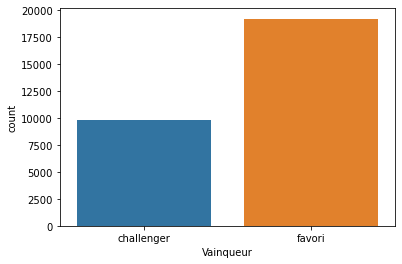

In [7]:
sns.countplot(x='Vainqueur',data=df)

<hr>
<h2 style="text-decoration :underline;color:green">Séparation feature et target</h2>

In [8]:
target = np.array([0 if i == 'challenger' else 1 for i in df.Vainqueur])

In [9]:
target

array([0, 0, 1, ..., 0, 0, 1])

In [10]:
#on enlève les cotes des bookmaker pour ne pas être biaisé par leur valeur.
data =  df.drop(["Vainqueur","PS_F","PS_C","B365_F","B365_C"],axis=1)

<hr>
<h2 style="text-decoration :underline;color:green">Phase de preprocessing </h2>

<h3 style="text-decoration :underline;color:blue">Variables catégorielles </h3>

In [11]:
#transformation en variables indicatrices
cat = data.loc[:,data.dtypes==np.object]
cat = pd.get_dummies(cat)


<h3 style="text-decoration :underline;color:blue">Variables numériques </h3>

In [12]:
#normalisation
num= data.select_dtypes(include='number')
scaler = MinMaxScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(num), columns = num.columns)
num_scaled.shape

(28990, 12)

<h3 style="text-decoration :underline;color:blue">Features finales </h3>

In [15]:
#jonction des variables numériques et  catégorielles
data = np.array(num_scaled.join(cat))
data

array([[0.05954825, 0.27132558, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.00616016, 0.46198405, 0.76315789, ..., 0.        , 0.        ,
        1.        ],
       [0.04004107, 0.30547699, 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.07084189, 0.27280906, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.00821355, 0.49083461, 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [0.02053388, 0.45568425, 0.66666667, ..., 1.        , 0.        ,
        0.        ]])

<hr>
<h2 style="text-decoration :underline;color:green">Séparation set entrainement et set test </h2>

In [16]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,shuffle=False,random_state=101)

<hr>
<h2 style="text-decoration :underline;color:green">Réseau de neurones </h2>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
X_train.shape

(23192, 18)

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [20]:
model2 = Sequential()

model2.add(Dense(units=18,activation='relu'))
model2.add(Dropout(rate=0.2))

model2.add(Dense(units=9,activation='relu'))
model2.add(Dropout(rate=0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss="binary_crossentropy",optimizer="adam")

In [21]:
model2.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
725/725 [==============================] - 1s 1ms/step - loss: 0.6548 - val_loss: 0.6267
Epoch 2/200
725/725 [==============================] - 0s 572us/step - loss: 0.6259 - val_loss: 0.6090
Epoch 3/200
725/725 [==============================] - 0s 569us/step - loss: 0.6181 - val_loss: 0.6031
Epoch 4/200
725/725 [==============================] - 0s 545us/step - loss: 0.6101 - val_loss: 0.6002
Epoch 5/200
725/725 [==============================] - 0s 558us/step - loss: 0.6105 - val_loss: 0.6013
Epoch 6/200
725/725 [==============================] - 0s 557us/step - loss: 0.6040 - val_loss: 0.5981
Epoch 7/200
725/725 [==============================] - 0s 556us/step - loss: 0.6017 - val_loss: 0.5974
Epoch 8/200
725/725 [==============================] - 0s 545us/step - loss: 0.6003 - val_loss: 0.5976
Epoch 9/200
725/725 [==============================] - 0s 556us/step - loss: 0.6027 - val_loss: 0.5962
Epoch 10/200
725/725 [==============================] - 0s 535us/step - los

In [22]:
loss2 = pd.DataFrame(model2.history.history)

<AxesSubplot:>

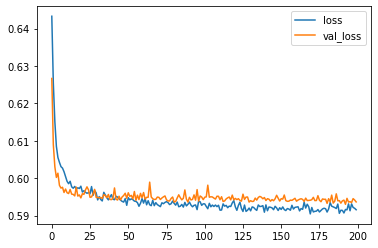

In [23]:
loss2.plot()

In [24]:
predictions =(model2.predict(X_test)>0.5).astype('int32')

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.24      0.34      1922
           1       0.71      0.90      0.79      3876

    accuracy                           0.68      5798
   macro avg       0.63      0.57      0.56      5798
weighted avg       0.65      0.68      0.64      5798



In [27]:
print(confusion_matrix(y_test,predictions))


[[ 469 1453]
 [ 390 3486]]


In [30]:
#récupération des probabilités de victoires
y_pred = model2.predict_proba(data)
proba = pd.DataFrame(y_pred,columns=["Proba_Favori"])

In [31]:
proba["Proba_Challenger"]= 1-proba["Proba_Favori"]

In [32]:
proba

,Proba_Favori,Proba_Challenger
0,0.708465,0.291535
1,0.719670,0.280330
2,0.521373,0.478627
3,0.518915,0.481085
4,0.540560,0.459440
...,...,...
28985,0.554577,0.445423
28986,0.751188,0.248812
28987,0.467380,0.532620
28988,0.340763,0.659237


<h3 style="text-decoration :underline;color:blue">Sauvegarde du dataframe pari  </h3>

In [34]:
#création du dataframe pari
pari = df[["PS_C","PS_F","Vainqueur"]]

#ajout de la prédiction
#pari = pari.join(predict)

#ajout des proba de prediction
pari = pari.join(proba)

#export du fichier pari pour éviter de relancer l'algo xgboost (qui est long) à chaque fois
pari.to_csv("pariANN.csv")

<hr>
<h2 style="text-decoration :underline;color:green">Création d'un dataframe pari pour étudier les écarts entre les probabilités algo et bookmaker </h2>

<p style="color:blue">D'après notre étude préliminiaire du dataset, nous avons remarqué que le bookmaker Pinnacle est beaucoup plus généreux que Bet365 avec un ROI de -2% pour Pinnacle contre -6.5% pour Bet365. On prendra uniquement les cotes de Pinnacle pour la suite de notre étude.</p>

<h2> Choix de l'algo pour le ROI </h2>

In [40]:
#lecture du fichier pari
pari = pd.read_csv("pariANN.csv",index_col=0)
pari["Prediction"] = [ "favori" if i >0.5 else "challenger" for i in pari['Proba_Favori']]

In [41]:
pari

,PS_C,PS_F,Vainqueur,Proba_Favori,Proba_Challenger,Prediction
0,2.21,1.719,challenger,0.708465,0.291535,favori
1,3.25,1.385,challenger,0.719670,0.280330,favori
2,2.18,1.746,favori,0.521373,0.478627,favori
3,1.82,2.060,favori,0.518915,0.481085,favori
4,2.90,1.455,favori,0.540560,0.459440,favori
...,...,...,...,...,...,...
28985,1.65,2.430,challenger,0.554577,0.445423,favori
28986,3.63,1.340,favori,0.751188,0.248812,favori
28987,1.85,2.090,challenger,0.467380,0.532620,challenger
28988,1.52,2.750,challenger,0.340763,0.659237,challenger


In [42]:
#ajout de l'indice de confiance sur la cote
pari["proba_PS_Challenger"]=1/pari.PS_C
pari["proba_PS_Favori"]=1/pari.PS_F

pari["gain_theoriq_F"] = pari.Proba_Favori*pari.PS_F
pari["gain_theoriq_C"] =  pari.Proba_Challenger*pari.PS_C

pari["gain_confiance"]="wait"

for i in range(len(pari)):
    if pari["Prediction"][i]== "favori":
        pari["gain_confiance"][i]= pari["gain_theoriq_F"][i]
    else:
        pari["gain_confiance"][i]= pari["gain_theoriq_C"][i]

<ipython-input-42-06badfe1e5cb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pari["gain_confiance"][i]= pari["gain_theoriq_F"][i]
<ipython-input-42-06badfe1e5cb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pari["gain_confiance"][i]= pari["gain_theoriq_C"][i]


In [43]:
#détermination de victoire du pari
pari["pari gagné"]=2
for i in range(len(pari)):
    if pari.Vainqueur[i] == pari.Prediction[i]:
        pari["pari gagné"][i]=1
    else:
        pari["pari gagné"][i]=0

#choix de la cote en fonction de la prediction
pari["cote"]=1.1
for i in range(len(pari)): 
    if pari.Prediction[i]=="favori":
        pari.cote[i] = pari.PS_F[i]
    else:
        pari.cote[i] = pari.PS_C[i]

#rangement en fonction de l'indice de confiance        
pari.sort_values(by = 'gain_confiance', ascending = False, inplace = True)

<ipython-input-43-f8aa0124b89c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pari["pari gagné"][i]=0
<ipython-input-43-f8aa0124b89c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pari["pari gagné"][i]=1
<ipython-input-43-f8aa0124b89c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pari.cote[i] = pari.PS_F[i]
<ipython-input-43-f8aa0124b89c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

<hr>
<h2 style="text-decoration :underline;color:green">Calcul du gain et du ROI en fonction du nombre de match </h2>

In [44]:
#création d'un dataframe test pour pouvoir tester plusieurs parametres essentiellement les cotes ici par exemple
test = pari
#test= test[test.Prediction == test.choix]
#on les range par indice décroissant
test.sort_values(by = 'gain_confiance', ascending = False, inplace = True)

test = test.reset_index().drop("index",axis=1)

In [45]:
test.to_csv("testdatanormal.csv")

In [46]:
test.head(50)

,PS_C,PS_F,Vainqueur,Proba_Favori,Proba_Challenger,Prediction,proba_PS_Challenger,proba_PS_Favori,gain_theoriq_F,gain_theoriq_C,gain_confiance,pari gagné,cote
0,1.070,11.510,challenger,0.509995,0.490005,favori,0.934579,0.086881,5.870038,0.524306,5.87004,0,11.51
1,1.060,10.730,challenger,0.511245,0.488755,favori,0.943396,0.093197,5.485663,0.518080,5.48566,0,10.73
2,1.090,9.550,challenger,0.514219,0.485781,favori,0.917431,0.104712,4.910795,0.529501,4.9108,0,9.55
3,9.250,1.098,favori,0.478299,0.521701,challenger,0.108108,0.910747,0.525172,4.825735,4.82574,0,9.25
4,1.126,8.150,challenger,0.578530,0.421470,favori,0.888099,0.122699,4.715016,0.474576,4.71502,0,8.15
5,8.080,1.120,favori,0.479142,0.520858,challenger,0.123762,0.892857,0.536639,4.208532,4.20853,0,8.08
6,7.900,1.140,favori,0.493453,0.506547,challenger,0.126582,0.877193,0.562537,4.001717,4.00172,0,7.90
7,1.232,4.910,challenger,0.798947,0.201053,favori,0.811688,0.203666,3.922830,0.247697,3.92283,0,4.91
8,1.213,5.300,challenger,0.726696,0.273304,favori,0.824402,0.188679,3.851491,0.331517,3.85149,0,5.30
9,1.156,6.800,challenger,0.552590,0.447410,favori,0.865052,0.147059,3.757613,0.517206,3.75761,0,6.80


In [47]:
#fonction calculant le gain pour n match pariés
def gain(n):
    gain = 0.1
    argent = 0.1
    gain_roi = []
    mise_totale = 0
    for i in range(n):
        mise = 1
        if test["pari gagné"][i] == 1:
                argent += mise * test.loc[i,"cote"] -1
        else:
                argent -= mise
    #print(f"pour {n} matchs, vous avez gagné {round(argent,2)} et le rendement est de {ROI}% ")
    return argent

#fonction calculant le ROI pour n match (c'est la meme fonction qu'au dessus mais je n'arrive pas à récupérer séparemment les valeurs du tuple ensuite)
def Rent(n):
    gain = 0.1
    argent = 0.1
    gain_roi = []
    mise_totale = 0
    for i in range(n):
        mise = 1
        if test["pari gagné"][i] == 1:
                gain += mise * test["cote"][i]
                argent += mise * test.loc[i,"cote"] -1
        else:
                argent -= mise
                gain += 0
        mise_totale += mise
    ROI = (gain -  n)/ n + 1 
    #print(f"pour {n} matchs, vous avez gagné {round(argent,2)} et le rendement est de {ROI}% ")
    return ROI

In [48]:
#création d'une liste de  gain en fonction du nombre de match parié
nombre_de_paris = np.linspace(1,len(test),50,dtype=int)
gain_pari = []
ROI=[]
for i in nombre_de_paris:
    gain_pari.append(gain(i))
    ROI.append(Rent(i))    

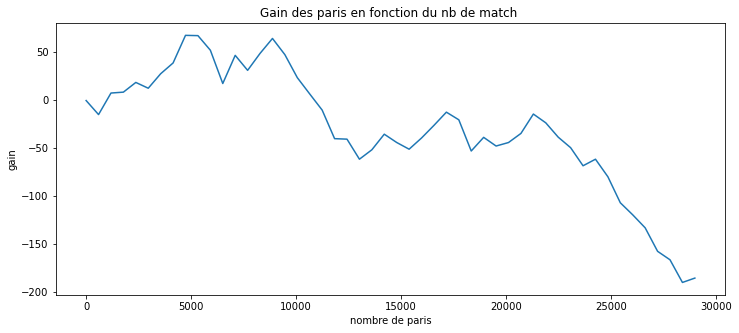

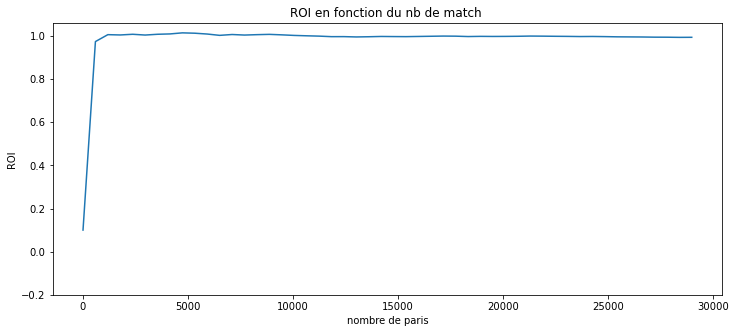

In [49]:
#affichage des gains en fonction du nombre de match pariés
plt.figure(figsize=(12,5))
plt.plot(nombre_de_paris, gain_pari)
plt.xlabel('nombre de paris')
plt.ylabel('gain');
plt.title(f"Gain des paris en fonction du nb de match ")
plt.show()

#affichage des gains en fonction du nombre de match pariés
plt.figure(figsize=(12,5))
plt.plot(nombre_de_paris, ROI)
plt.xlabel('nombre de paris')
plt.ylabel('ROI');
plt.title(f"ROI en fonction du nb de match ")
plt.ylim(-0.2)
plt.show()
